In [1]:
# import os

# if os.path.realpath(".").split(os.path.sep)[-1] != "Quant-Finance":
# os.chdir("..")


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import quant as qt

/Users/nakulrandad/Development/Quant-Finance/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
qt.plot.set_plot_options()

## Nifty ETFs and Mutual Funds against Nifty 50 Index

In [4]:
schemes = qt.api.mf_list(filter=["Nifty", "50", "UTI|Navi", "Direct", "Growth"])
schemes

,schemeCode,schemeName,isinGrowth,isinDivReinvestment
15587,120716,UTI Nifty 50 Index Fund - Growth Option- Direct,INF789F01XA0,None
29231,143341,UTI Nifty Next 50 Index Fund - Direct Plan - G...,INF789FC12T1,None
33376,149039,Navi Nifty 50 Index Fund-Direct Plan-Growth,INF959L01FP2,None
33713,149447,Navi Nifty Next 50 Index Fund- Direct Plan- Gr...,INF959L01FR8,None
33961,149892,Navi Nifty Midcap 150 Index Fund Direct Plan- ...,INF959L01FX6,None
34147,150313,UTI Nifty Midcap 150 Quality 50 Index Fund - D...,INF789F1AVH8,None
35082,151471,NAVI ELSS TAX SAVER NIFTY 50 INDEX FUND - DIRE...,INF959L01GR6,None
35270,151739,UTI Nifty 500 Value 50 Index Fund - Direct Pla...,INF789F1AYN0,None
35292,151762,UTI Nifty50 Equal Weight Index Fund - Direct P...,INF789F1AYP5,None
36442,153089,UTI Nifty Midcap 150 Index Fund - Direct Plan ...,INF789F1AZO5,None


In [5]:
mf_df = pd.DataFrame.quant.mutual_fund([120716, 149039]).quant.to_returns()
mf_df.quant.first_valid_index()

asset
Navi Nifty 50 Index Fund-Direct Plan-Growth       2021-07-19
UTI Nifty 50 Index Fund - Growth Option- Direct   2013-01-03
Name: date, dtype: datetime64[ns]

In [6]:
nifty_etf = (
    pd.DataFrame.quant.ticker(["NIFTYBEES.NS", "SETFNIF50.NS"])
    .loc["2020-01-01":]
    .quant.to_returns()
)
nifty_etf

Ticker,NIFTYBEES.NS,SETFNIF50.NS
date,,
2020-01-02,0.005563,0.005330
2020-01-03,-0.003304,-0.001424
2020-01-06,-0.018040,-0.017038
2020-01-07,0.003062,0.002338
2020-01-08,-0.001565,-0.002332
...,...,...
2025-03-13,-0.002701,-0.003527
2025-03-17,0.004461,0.003498
2025-03-18,0.000000,0.000000


In [7]:
bmk = pd.DataFrame.quant.ticker("^NSEI").quant.to_returns()
bmk

Ticker,^NSEI
date,
2007-09-18,0.011469
2007-09-19,0.040946
2007-09-20,0.003212
2007-09-21,0.018957
2007-09-24,0.019566
...,...
2025-03-13,-0.003262
2025-03-17,0.004981
2025-03-18,0.014463


In [8]:
df = pd.concat([mf_df, nifty_etf, bmk], axis=1).quant.ralign()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='date'>

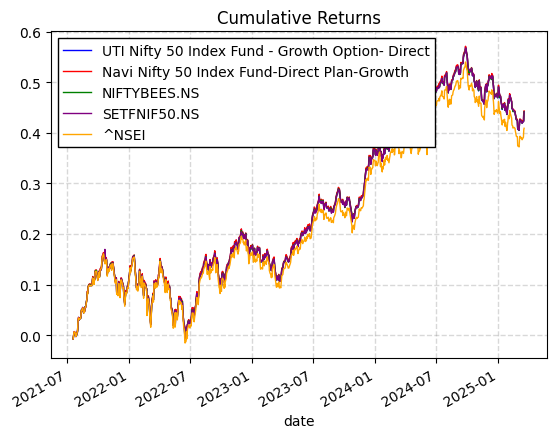

In [9]:
df.cumsum().plot(title="Cumulative Returns")

In [10]:
qt.backtest.perf_summary_table(df.drop(columns=["^NSEI"]), bmk=df[["^NSEI"]])

In [11]:
qt.backtest.perf_summary_table(df[["^NSEI"]])

<Axes: >

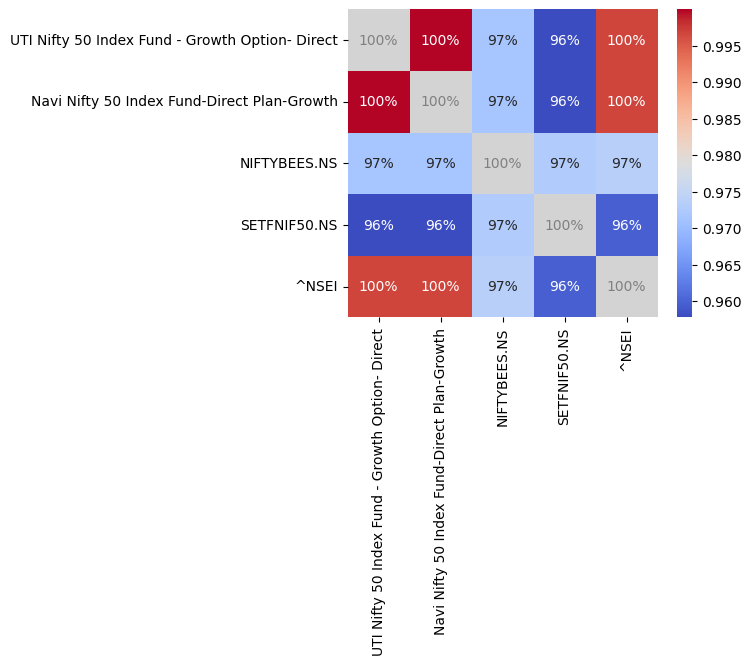

In [12]:
plt.figure(figsize=(5, 4))
qt.plot.corr(df)

<Axes: title={'center': 'Rolling 1-year volatility'}, xlabel='date'>

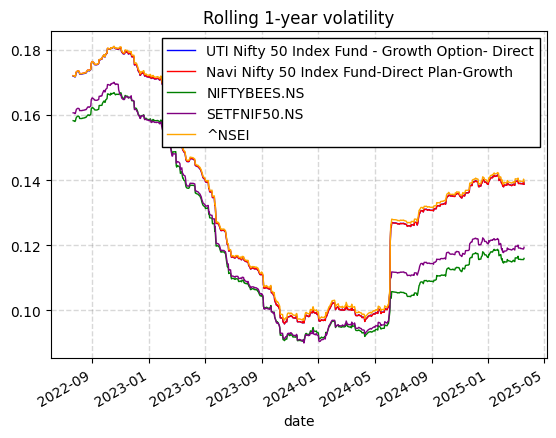

In [13]:
df.rolling(252).std().mul(252**0.5).plot(title="Rolling 1-year volatility")

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

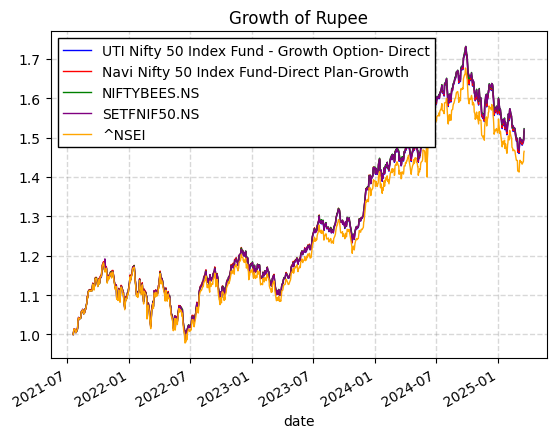

In [14]:
df.quant.to_prices().quant.rebase(1).plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

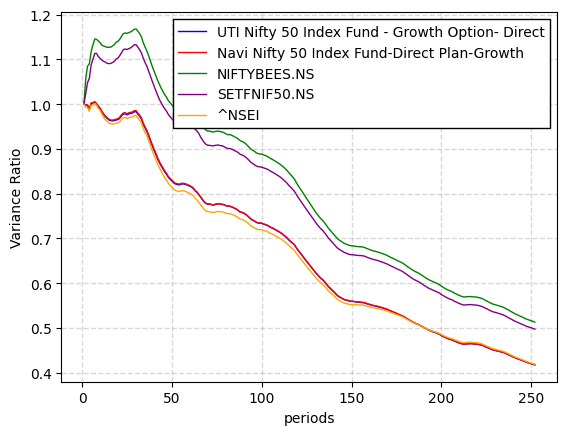

In [15]:
df.quant.variance_ratio_test().plot(ylabel="Variance Ratio", xlabel="periods")

## Junior Bees vs Nifty Bees

In [16]:
next50 = pd.DataFrame.quant.ticker(["JUNIORBEES.NS"]).quant.to_returns()

In [17]:
merged = pd.concat([df[["NIFTYBEES.NS"]], next50], axis=1).quant.ralign()
qt.backtest.perf_summary_table(merged, bmk=merged[["NIFTYBEES.NS"]])

<Axes: title={'center': 'Growth of Rupee'}, xlabel='date'>

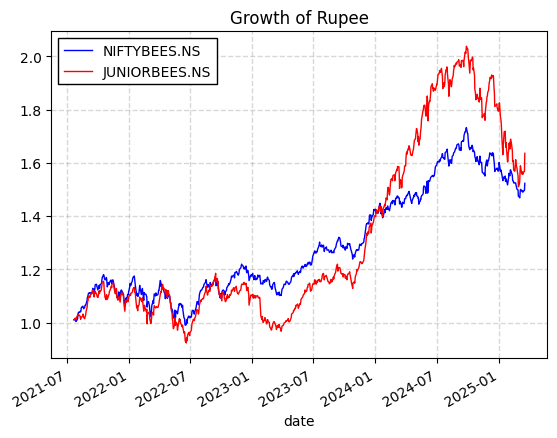

In [18]:
merged.quant.to_prices().plot(title="Growth of Rupee")

<Axes: xlabel='periods', ylabel='Variance Ratio'>

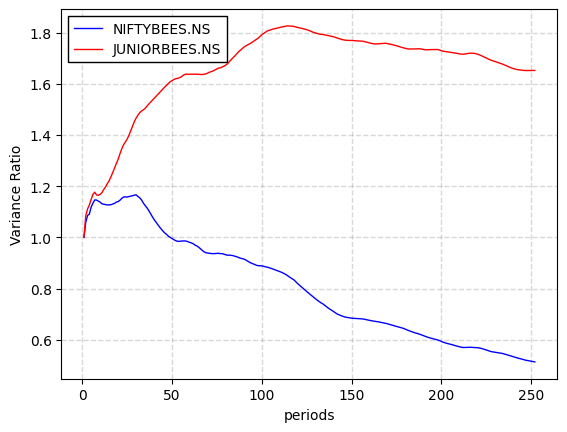

In [19]:
merged.quant.variance_ratio_test(periods=252).plot(
    ylabel="Variance Ratio", xlabel="periods"
)

# Nifty50/500 and S&P500

In [20]:
ret = (
    pd.DataFrame.quant.ticker(["^NSEI", "^CRSLDX", "^GSPC"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.describe()

Ticker,^NSEI,^CRSLDX,^GSPC
count,913.000000,913.000000,913.000000
mean,0.002126,0.002233,0.001726
std,0.028125,0.028625,0.023845
min,-0.190239,-0.186527,-0.151689
25%,-0.012626,-0.011637,-0.007942
50%,0.003797,0.004443,0.004072
75%,0.017450,0.018450,0.014861
max,0.174692,0.193851,0.113127


<Axes: xlabel='Ticker', ylabel='Ticker'>

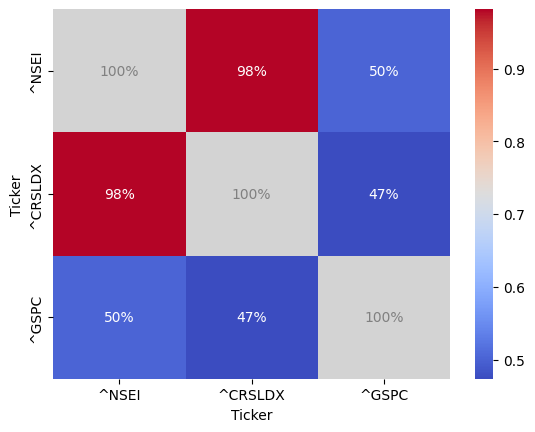

In [21]:
qt.plot.corr(ret)

Start date: 2007-09-26
End date: 2025-03-19


,Start Date,End Date,Drawdown
^NSEI,2008-01-09,2009-03-11,-58.97%
^CRSLDX,2008-01-09,2009-03-11,-63.92%


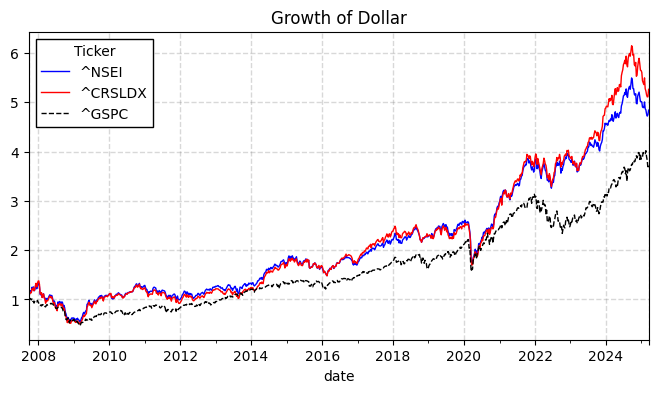

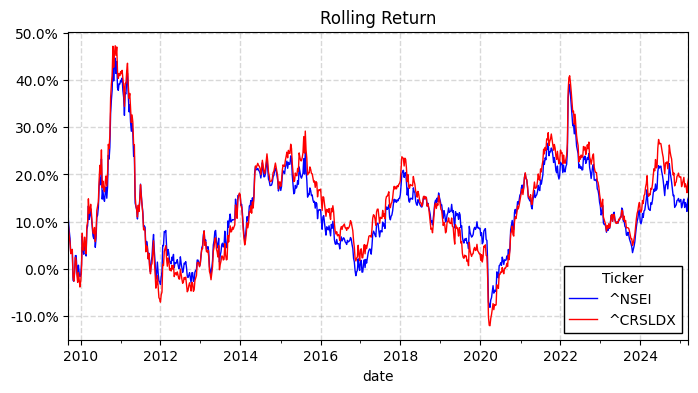

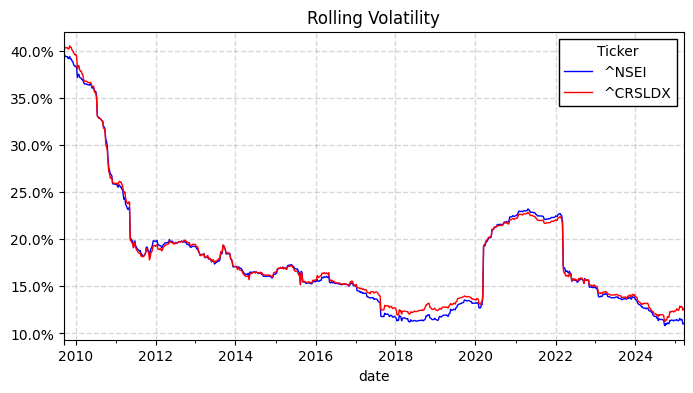

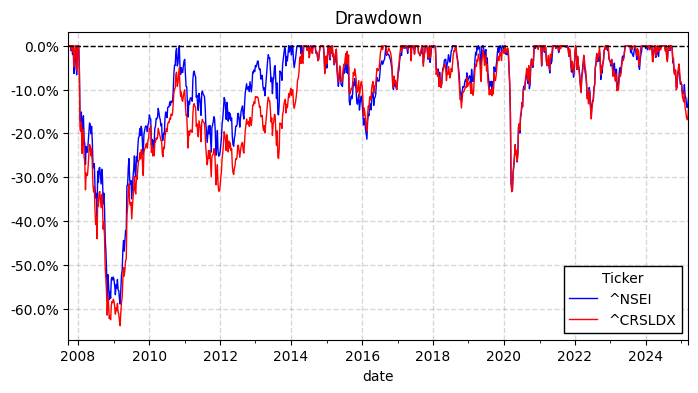

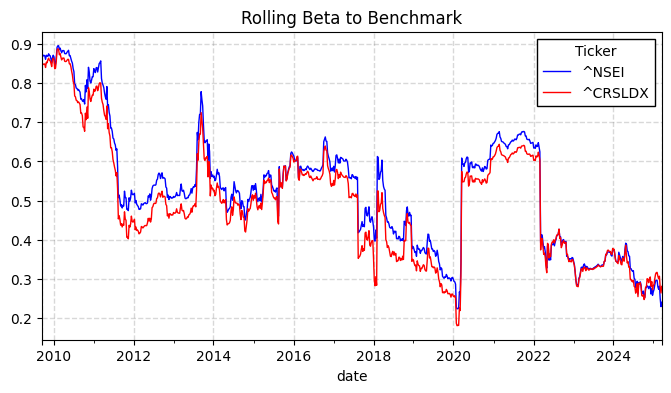

In [22]:
qt.backtest.perf_report(ret.iloc[:, :-1], bmk=ret[["^GSPC"]], yr=52, window=104)

In [ ]:
ret = (
    pd.DataFrame.quant.ticker(["^CRSLDX", "^GSPC", "INR=X", "GC=F", "BZ=F"])
    .quant.palign()
    .quant.to_returns()
    .quant.agg_returns("W")
)
ret.describe()

asset
^CRSLDX   2007-08-08
^GSPC     2007-08-08
INR=X     2007-08-08
GC=F      2007-08-08
BZ=F      2007-08-08
Name: date, dtype: datetime64[ns]


In [50]:
ret.iloc[:, :1].quant.factor_model(ret.iloc[:, 1:]).style.set_caption(
    "Factor Model for NSE500"
).background_gradient(cmap="Greens_r", subset=["bic"])

<Axes: title={'center': 'Rolling Multibeta of NSE500'}, xlabel='date'>

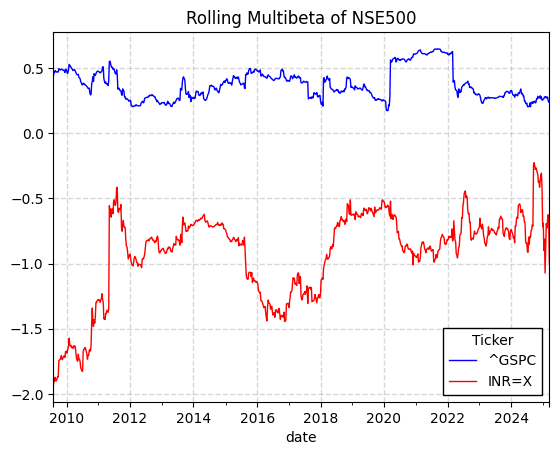

In [25]:
qt.backtest.rolling_multibeta(
    ret.iloc[:, :1], factors=ret.iloc[:, 1:3], window=104
).plot(title="Rolling Multibeta of NSE500")

In [ ]:
qt.backtest.risk_decomposition(
    ret.iloc[:, :1], factors=ret.iloc[:, 1:3]
).style.set_caption("Risk Decomposition of NSE500")

,Beta,Variance Contribution,Percentage Contribution
^GSPC,0.448108,0.000146,0.177661
INR=X,-0.960303,0.000124,0.150899
Residual,NaN,0.000553,0.671440


<Axes: title={'center': 'Rolling Risk Decomposition of NSE500'}, xlabel='date', ylabel='Risk Contribution (in %)'>

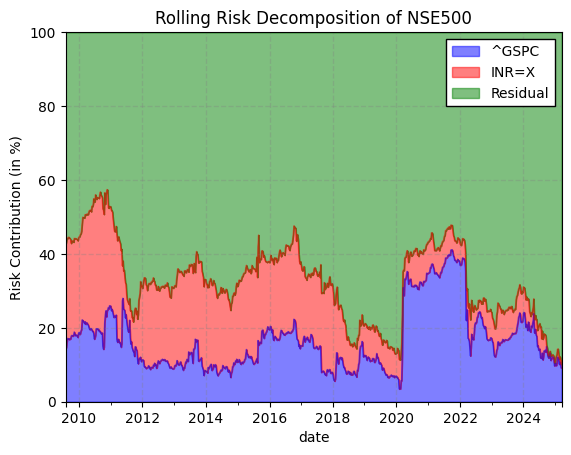

In [45]:
decomp = qt.backtest.rolling_risk_decomp(
    ret.iloc[:, :1], factors=ret.iloc[:, 1:3], window=104
)
decomp.mul(100).plot(
    stacked=True,
    kind="area",
    alpha=0.5,
    title="Rolling Risk Decomposition of NSE500",
    ylabel="Risk Contribution (in %)",
    ylim=(0, 100),
)